In [48]:
#Libraries

import math
import cmath
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display
import time


# Projeto 2 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Cristiano Tolentino Santos
## Matrícula: 211028050

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [49]:
#Usefull signals

def δ(n):
    if n == 0:
        return 1
    else:
        return 0

def u(n):
    if n <= 0:
        return 1
    else:
        return 0

# Questão 1

Um sistema de aquisição de dados de eletrocardiograma foi ligado de forma equivocada perto demais da rede elétrica. Assim, a interferência da rede elétrica (a 60 Hz) aparece de forma marcante no sinal adquirido. O seu objetivo é projetar um filtro digital para eliminar totalmente o ruído em 60Hz. A frequência de amostragem do sistema é: 

$$ f_a = 500~Hz $$ 

Siga as questões abaixo.

## Questão 1a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

In [50]:
#

## Questão 1b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

In [51]:
#

## Questão 1c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

Gráfico da resposta em magnitude


c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


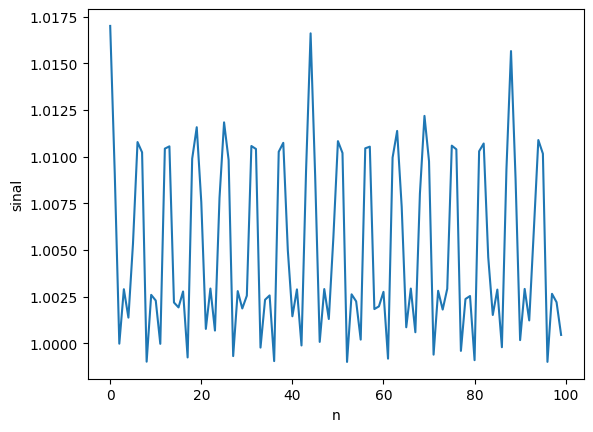

Gráfico da resposta em fase


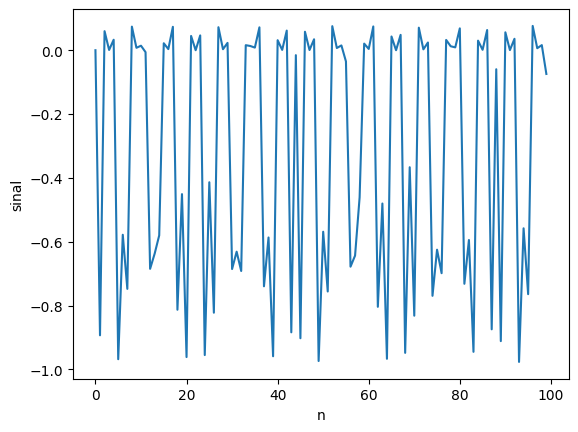

In [52]:
def resposta_magnitude(omega):
    a = 0.99
    b = np.sqrt(1 - np.sqrt(2)*a*3*np.cos(omega) + np.sqrt(2)*a*1j*np.sin(omega) + 2*(a**2) + (np.e**(2j*omega)))
    c = np.sqrt(1 - np.sqrt(2)*((a**3)+(2*a))*np.cos(omega) + np.sqrt(2)*(a**3)*1j*np.sin(omega) + 2*(a**2) + (a**2)*(np.e**(2j*omega)))
    
    return (b/c)

def resposta_fase(omega):
    a = 0.99
    b = (np.sqrt(2)*(a**3)*1j*np.sin(omega))
    c = (1 - np.sqrt(2)*((a**3) + (2*a))*np.cos(omega) + 2*(a**2) + ((a**2)*np.e**(2j*omega)))
    return -np.arctan(b/c)

rm = []
rf = []
for i in range(100):
    rm.append(resposta_magnitude(i))
    rf.append(resposta_fase(i))

print("Gráfico da resposta em magnitude")
plt.plot(rm)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

print("Gráfico da resposta em fase")
plt.plot(rf)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

## Questão 1d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

Sinal noisy_ecg_data.mat antes da filtragem


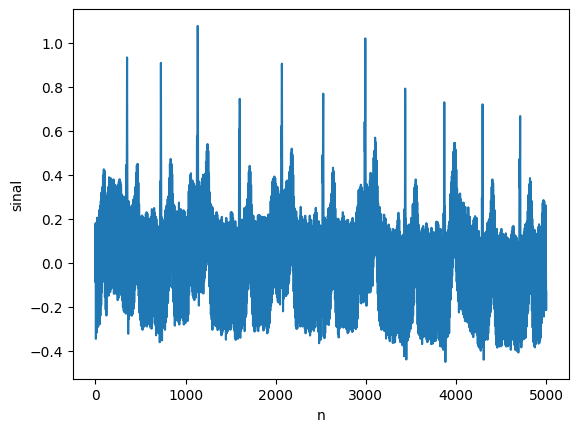

Sinal noisy_ecg_data.mat filtrado


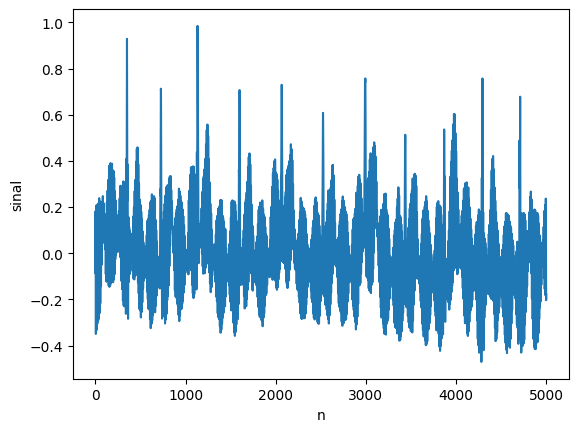

In [53]:
def filtro(s):
    memoria = []
    a = 0.99
    for i in range(len(s)):
        if ((i-1) < 0):
            resposta = s[i] - np.sqrt(2)*0 + (a**2)*0 + a*np.sqrt(2)*0 - 0
        elif ((i-2) < 0):
            resposta = s[i] - np.sqrt(2)*s[i-1] + (a**2)*0 + a*np.sqrt(2)*memoria[i-1] - 0
        else:
            resposta = s[i] - np.sqrt(2)*s[i-1] + (a**2)*s[i-2] + a*np.sqrt(2)*memoria[i-1] - memoria[i-2]
        memoria.append(resposta)
    return memoria

sinal = sp.io.loadmat('noisy_ecg_data.mat')['noisy_ecg'].ravel()

print("Sinal noisy_ecg_data.mat antes da filtragem")
plt.plot(sinal)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

sinal_filtrado = filtro(sinal)

print("Sinal noisy_ecg_data.mat filtrado")
plt.plot(sinal_filtrado)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()


# Questão 2

Ainda no sistema de aquisição de dados de eletrocardiograma, mais tarde foi verificado que, mesmo depois de resolvido o problema da interferência da rede elétrica (i.e., o sinal não tem um ruído específico em 60Hz), o sinal adquirido tinha bastante ruído de alta frequência (acima de 35Hz). O objetivo desta questão é projetar um filtro digital para atenuar as frequências acima de 35Hz. A frequêencia de amostragem do sistema é:

$$ f_a = 500~Hz $$

Siga as questões abaixo.

## Questão 2a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

In [54]:
#Resposta da questão 2a

## Questão 2b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

In [55]:
#Resposta da questão 2b

## Questão 2c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

In [56]:
#Resposta da questão 2c

## Questão 2d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data_2.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

In [57]:
#Resposta da questão 2d

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

# Questão 3

Considere o filtro analógico:

$$ H_a \left(s\right) = \frac{\omega_c}{\omega_c + s}$$

E considere o valor:

$$\omega_c = 10^3 $$

## Questão 3a (1  ponto)

Projete uma aproximação digital para este filtro com critério de 10%. Indique a taxa de amostragem calculada para esta aproximação (T1) e compare a resposta em frequência do filtro projetado H1() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

In [58]:
#Resposta da questão 3a

## Questão 3b (1  ponto)

Projete uma aproximação digital para este filtro com critério de 1%. Indique a taxa de amostragem calculada para esta aproximação (T2) e compare a resposta em frequência do filtro projetado H2() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

In [59]:
#Resposta da questão 3b

## Questão 3c (1 ponto)

Calcule a resposta ao impulso ha(t) do filtro analógico Ha(s), bem como as respostas ao impulso h1[n] e h2[n] dos filtros projetados H1(z) e H2(z). **Plote** as respostas ao impulso na mesma escala.

In [60]:
#Resposta da questão 3c

## Questão 3d (2 pontos)

Considere o sinal:
$$ x\left(t\right) = e^{- \lambda t} u\left(t\right)$$

com

$$\lambda = 500 $$

Calcule a resposta teórica do filtro analógico, y(t), bem como a resposta do filtro digital H1(z) ao sinal amostrado com taxa T1 (x1[n]) e a resposta do filtro digital H2(z) ao sinal amostrado com taxa T2 (x2[n]). **Plote**, na mesma escala, o sinal y(t) e as aproximações y1[n] e y2[n]. 

In [61]:
#Resposta da questão 3d